In [1]:
import pandas as pd
import json
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
import datetime
import copy
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
import pickle 
from scipy.stats import iqr

/home/hitkul/anaconda3/envs/PSOSM/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [2]:
with open('data/RT_and_QT_info.json', 'r') as fp:
    RT_and_QT_info = json.load(fp)

In [3]:
df = pd.read_pickle('data/tweet_data.p')

In [4]:
with open('data/all_tweets_timestamp.json', 'r') as fp:
    tweet_id_time_stamp = json.load(fp)

In [5]:
user_retweet_time_record = dict()
tweet_retweet_time_record = dict()
datetimeFormat = '%a %b %d %H:%M:%S +0000 %Y'

In [6]:
def get_retweet_time(row):
    id_ = repr(row['tweet_id'])
    creation_date = row['date']
    creation_date = datetime.datetime.strptime(creation_date, datetimeFormat)
    
    retweets = RT_and_QT_info[id_]['retweet_user_info']
    quoted = RT_and_QT_info[id_]['quoted_user_info']
    
    global user_retweet_time_record
    global tweet_retweet_time_record
    
    if id_ not in tweet_retweet_time_record.keys():
            tweet_retweet_time_record[id_] = {'retweet':[],'quoted':[]}
            
    
    for r_ids,r_user in retweets.items():
        r_date = tweet_id_time_stamp[r_ids]
        r_date = datetime.datetime.strptime(r_date, datetimeFormat)
        retweet_time = int((r_date-creation_date).total_seconds() / 60)
        
        
        tweet_retweet_time_record[id_]['retweet'].append(retweet_time)
        
        if r_user[1] not in user_retweet_time_record.keys():
            user_retweet_time_record[r_user[1]] = {'retweet':[],'quoted':[]}
        user_retweet_time_record[r_user[1]]['retweet'].append(retweet_time)
        
    for q_ids,q_user in quoted.items():
        q_date = tweet_id_time_stamp[q_ids]
        q_date = datetime.datetime.strptime(q_date, datetimeFormat)
        qout_time = int((q_date-creation_date).total_seconds() / 60)
        
        
        tweet_retweet_time_record[id_]['quoted'].append(qout_time)
        
        if q_user[1] not in user_retweet_time_record.keys():
            user_retweet_time_record[q_user[1]] = {'retweet':[],'quoted':[]}
        user_retweet_time_record[q_user[1]]['quoted'].append(qout_time)

In [7]:
df.progress_apply(lambda row:get_retweet_time(row), axis=1)

1566831    None
1241688    None
9968688    None
2558232    None
3285366    None
           ... 
58569      None
8631207    None
4539384    None
1001734    None
781194     None
Length: 10000, dtype: object

#### Calculate average RT and QT

In [9]:
tweet_avg_rt_all = []
tweet_avg_qt_all = []

In [10]:
user_avg_rt_all = []
user_avg_qt_all = []

In [11]:
temp = copy.deepcopy(tweet_retweet_time_record)
for id_, value in tqdm(temp.items()):
    if len(value['retweet'])!=0:
        avg_rt_time = float(sum(value['retweet']))/len(value['retweet'])
    else:
        avg_rt_time = 0.0
        
    if len(value['quoted'])!=0:
        avg_qt_time = float(sum(value['quoted']))/len(value['quoted'])
    else:
        avg_qt_time = 0.0
    
    tweet_avg_rt_all.append(avg_rt_time)
    tweet_avg_qt_all.append(avg_qt_time)
    tweet_retweet_time_record[id_]['avg_rt_time'] = avg_rt_time
    tweet_retweet_time_record[id_]['avg_qt_time'] = avg_qt_time

/home/hitkul/anaconda3/envs/PSOSM/lib/python3.6/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [12]:
temp = copy.deepcopy(user_retweet_time_record)
for id_, value in tqdm(temp.items()):
    if len(value['retweet'])!=0:
        avg_rt_time = float(sum(value['retweet']))/len(value['retweet'])
    else:
        avg_rt_time = 0.0
        
    if len(value['quoted'])!=0:
        avg_qt_time = float(sum(value['quoted']))/len(value['quoted'])
    else:
        avg_qt_time = 0.0
    
    user_avg_rt_all.append(avg_rt_time)
    user_avg_qt_all.append(avg_qt_time)
    user_retweet_time_record[id_]['avg_rt_time'] = avg_rt_time
    user_retweet_time_record[id_]['avg_qt_time'] = avg_qt_time

/home/hitkul/anaconda3/envs/PSOSM/lib/python3.6/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [13]:
del(temp)

## Analysis

#### Analysis of avg rt time for all tweets

In [14]:
tweet_avg_rt_all = list(filter(lambda a: a != 0.0, tweet_avg_rt_all))

In [15]:
print(len([i for i in tweet_avg_rt_all if i<1.0]))

5


(array([2.724e+03, 8.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([5.00000000e-01, 2.98096450e+05, 5.96192400e+05, 8.94288350e+05,
        1.19238430e+06, 1.49048025e+06, 1.78857620e+06, 2.08667215e+06,
        2.38476810e+06, 2.68286405e+06, 2.98096000e+06]),
 <a list of 10 Patch objects>)

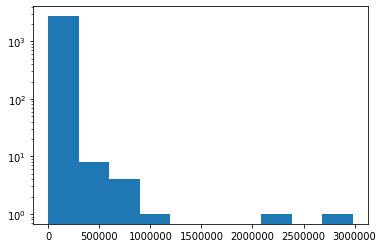

In [16]:
plt.hist(tweet_avg_rt_all,log=True)

#### Analysis of avg qt time for all tweets

In [17]:
tweet_avg_qt_all = list(filter(lambda a: a != 0.0, tweet_avg_qt_all))

In [18]:
print(len([i for i in tweet_avg_qt_all if i<1.0]))

1


(array([701.,   2.,   1.,   3.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([4.0000000e-01, 9.0364860e+04, 1.8072932e+05, 2.7109378e+05,
        3.6145824e+05, 4.5182270e+05, 5.4218716e+05, 6.3255162e+05,
        7.2291608e+05, 8.1328054e+05, 9.0364500e+05]),
 <a list of 10 Patch objects>)

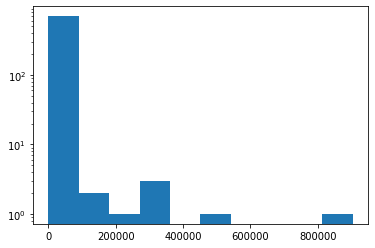

In [19]:
plt.hist(tweet_avg_qt_all, log=True)

# USER

#### Analysis of avg rt time for all users

In [20]:
no_of_retweet_per_user = [len(user_retweet_time_record[i]["retweet"]) for i in tqdm(user_retweet_time_record.keys()) if len(user_retweet_time_record[i]["retweet"])>5]

/home/hitkul/anaconda3/envs/PSOSM/lib/python3.6/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [21]:
max(no_of_retweet_per_user)

56

In [22]:
sorted(no_of_retweet_per_user,reverse=True)[:10]

[56, 53, 19, 17, 17, 17, 16, 16, 15, 15]

(array([312.,  39.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 6., 11., 16., 21., 26., 31., 36., 41., 46., 51., 56.]),
 <a list of 10 Patch objects>)

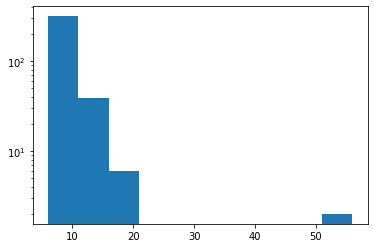

In [23]:
plt.hist(no_of_retweet_per_user,log=True)

In [24]:
len(user_avg_rt_all)

34567

In [25]:
user_avg_rt_all = [user_retweet_time_record[i]["avg_rt_time"] for i in tqdm(user_retweet_time_record.keys()) if len(user_retweet_time_record[i]["retweet"])>5]

/home/hitkul/anaconda3/envs/PSOSM/lib/python3.6/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [26]:
len(user_avg_rt_all)

359

In [27]:
user_avg_rt_all = [i for i in user_avg_rt_all if i!=0.0]

In [28]:
len(user_avg_rt_all)

358

(array([347.,   3.,   2.,   1.,   2.,   1.,   0.,   0.,   1.,   1.]),
 array([4.28571429e-01, 1.05169143e+04, 2.10334000e+04, 3.15498857e+04,
        4.20663714e+04, 5.25828571e+04, 6.30993429e+04, 7.36158286e+04,
        8.41323143e+04, 9.46488000e+04, 1.05165286e+05]),
 <a list of 10 Patch objects>)

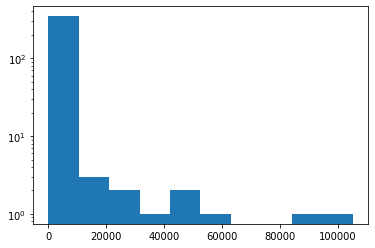

In [29]:
plt.hist(user_avg_rt_all,log=True)

#### Analysis of avg qt time for all users

In [30]:
user_avg_qt_all = list(filter(lambda a: a != 0.0, user_avg_qt_all))

In [31]:
print(len([i for i in user_avg_qt_all if i<1.0]))

1


(array([2.281e+03, 2.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([4.0000000e-01, 9.0364860e+04, 1.8072932e+05, 2.7109378e+05,
        3.6145824e+05, 4.5182270e+05, 5.4218716e+05, 6.3255162e+05,
        7.2291608e+05, 8.1328054e+05, 9.0364500e+05]),
 <a list of 10 Patch objects>)

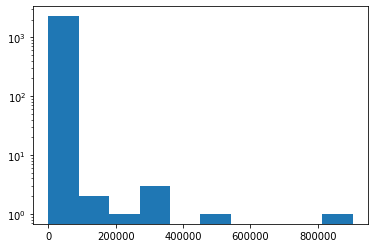

In [32]:
plt.hist(user_avg_qt_all,log=True)

Pulling out users with less than 1 avg RT score

In [33]:
suspected_users = []
for user,values in tqdm(user_retweet_time_record.items()):
    if values['avg_rt_time']>0.0 and values['avg_rt_time']<=1.0:
        suspected_users.append((user,len(values['retweet'])))

/home/hitkul/anaconda3/envs/PSOSM/lib/python3.6/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [34]:
len(suspected_users)

426

In [35]:
list(reversed(sorted(list(filter(lambda x: x[1]>=5, suspected_users)), key=lambda x: x[1])))

[('mistbag', 7)]